### Import libraries

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import LabelEncoder

### 1. Load Dataset

In [4]:
df =pd.read_csv("../Dataset/bengaluru_house_prices.csv")
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### Explore Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [7]:
df.shape

(13320, 9)

In [8]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [9]:
object_columns =df.select_dtypes(include='object').columns.to_list()
object_columns

['area_type', 'availability', 'location', 'size', 'society', 'total_sqft']

In [10]:
for col in object_columns:
    print(df[col].unique())
    print("*"*50)

['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
**************************************************
['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Jan' '14-Jul']
**************************************************
['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 

In [11]:
### drop some of features that are not important for out model 
featrues_to_drop =['availability', 'location', 'society']
df.drop(featrues_to_drop,axis='columns',inplace=True)

In [12]:
df.columns

Index(['area_type', 'size', 'total_sqft', 'bath', 'balcony', 'price'], dtype='object')

### Featrue Engineering

In [13]:
df.isnull().sum()

area_type       0
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [14]:
df[df['size'].isnull()]

,area_type,size,total_sqft,bath,balcony,price
579,Plot Area,NaN,1200 - 2400,NaN,NaN,34.185
1775,Plot Area,NaN,2000 - 5634,NaN,NaN,124.000
2264,Plot Area,NaN,2400,NaN,NaN,460.000
2809,Plot Area,NaN,1200 - 2400,NaN,NaN,28.785
2862,Plot Area,NaN,1500 - 2400,NaN,NaN,46.800
5333,Plot Area,NaN,2100 - 5405,NaN,NaN,177.115
6423,Plot Area,NaN,2324,NaN,NaN,26.730
6636,Plot Area,NaN,1500,NaN,NaN,25.490
6719,Plot Area,NaN,800 - 2660,NaN,NaN,28.545
7680,Plot Area,NaN,5000,NaN,NaN,400.000


In [15]:
df['bhk'] =df['size'].apply(lambda x: int(x.split()[0]) if isinstance(x,str)  else None)

In [16]:
df['bhk']

0        2.0
1        4.0
2        3.0
3        3.0
4        2.0
        ... 
13315    5.0
13316    4.0
13317    2.0
13318    4.0
13319    1.0
Name: bhk, Length: 13320, dtype: float64

In [17]:
# drop size columns 
df.drop('size',axis=1,inplace=True)

Handel Null values 

In [18]:
df.isnull().sum()

area_type       0
total_sqft      0
bath           73
balcony       609
price           0
bhk            16
dtype: int64

In [19]:
num_cols =['balcony','bhk','bath']

# fill null values uing median 

df[num_cols] =df[num_cols].fillna(df[num_cols].median())

In [20]:
df.isnull().sum()

area_type     0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

In [21]:
# check duplication 
df.duplicated().sum()

np.int64(1360)

In [22]:
# drop duplication 
df.drop_duplicates(inplace=True)

In [23]:
df.duplicated().sum()

np.int64(0)

In [24]:
# check data inside total sqft
df['total_sqft'].head()

0    1056
1    2600
2    1440
3    1521
4    1200
Name: total_sqft, dtype: object

- the datatype of sqft is object we need to convert it inot float

In [25]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [26]:
# Catch rows that are not converted to float 
df[~df['total_sqft'].apply(is_float)]

,area_type,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,2100 - 2850,4.0,0.0,186.000,4.0
56,Built-up Area,3010 - 3410,2.0,2.0,192.000,4.0
81,Built-up Area,2957 - 3450,2.0,2.0,224.500,4.0
122,Super built-up Area,3067 - 8156,4.0,0.0,477.000,4.0
137,Super built-up Area,1042 - 1105,2.0,0.0,54.005,2.0
...,...,...,...,...,...,...
12975,Super built-up Area,850 - 1060,2.0,0.0,38.190,2.0
12990,Super built-up Area,1804 - 2273,3.0,0.0,122.000,3.0
13059,Super built-up Area,1200 - 1470,2.0,0.0,72.760,2.0
13240,Super built-up Area,1020 - 1130,2.0,2.0,52.570,1.0


Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple

In [27]:
# convert object to float 
def convert_obj_float(x):
    tokens =x.split('-')
    if len(tokens) == 2:
        avg = sum(map(float,tokens))/2
        return avg
    try:
        return float(x)
    except:
        return None

In [30]:
df['total_sqft'] =df['total_sqft'].apply(convert_obj_float)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11960 entries, 0 to 13318
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   11960 non-null  object 
 1   total_sqft  11914 non-null  float64
 2   bath        11960 non-null  float64
 3   balcony     11960 non-null  float64
 4   price       11960 non-null  float64
 5   bhk         11960 non-null  float64
dtypes: float64(5), object(1)
memory usage: 654.1+ KB


In [36]:
# add new feature 
df['price_per_sqr_f'] =df['price']*100000 /df['total_sqft']

In [37]:
df.head()

,area_type,total_sqft,bath,balcony,price,bhk,price_per_sqr_f
0,Super built-up Area,1056.0,2.0,1.0,39.07,2.0,3699.810606
1,Plot Area,2600.0,5.0,3.0,120.00,4.0,4615.384615
2,Built-up Area,1440.0,2.0,3.0,62.00,3.0,4305.555556
3,Super built-up Area,1521.0,3.0,1.0,95.00,3.0,6245.890861
4,Super built-up Area,1200.0,2.0,1.0,51.00,2.0,4250.000000


### check outlier

As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [38]:
# the outlier rows that the sqrt for each bedroom is less than 300
df[df['total_sqft']/df['bhk']<300]

,area_type,total_sqft,bath,balcony,price,bhk,price_per_sqr_f
9,Plot Area,1020.0,6.0,2.0,370.0,6.0,36274.509804
45,Plot Area,600.0,9.0,2.0,200.0,8.0,33333.333333
58,Plot Area,1407.0,4.0,1.0,150.0,6.0,10660.980810
68,Plot Area,1350.0,7.0,0.0,85.0,8.0,6296.296296
70,Plot Area,500.0,3.0,2.0,100.0,3.0,20000.000000
...,...,...,...,...,...,...,...
13221,Plot Area,1178.0,9.0,1.0,75.0,9.0,6366.723260
13277,Plot Area,1400.0,7.0,2.0,218.0,7.0,15571.428571
13279,Plot Area,1200.0,5.0,2.0,130.0,6.0,10833.333333
13281,Plot Area,1375.0,5.0,1.0,125.0,5.0,9090.909091


In [41]:
# so will remove outlier
df=df[~(df['total_sqft']/df['bhk']<300)]
df.shape

(11243, 7)

In [42]:
df.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqr_f
count,11197.000000,11243.000000,11243.000000,11243.000000,11243.000000,11197.000000
mean,1631.218086,2.595393,1.607400,116.573567,2.685582,6437.921618
std,1319.006915,1.116121,0.812258,159.132420,1.010773,4291.644586
min,300.000000,1.000000,0.000000,8.440000,1.000000,267.829813
25%,1125.000000,2.000000,1.000000,50.000000,2.000000,4280.890253
50%,1330.000000,2.000000,2.000000,72.000000,3.000000,5398.153846
75%,1747.000000,3.000000,2.000000,120.000000,3.000000,7044.749668
max,52272.000000,16.000000,3.000000,3600.000000,16.000000,176470.588235


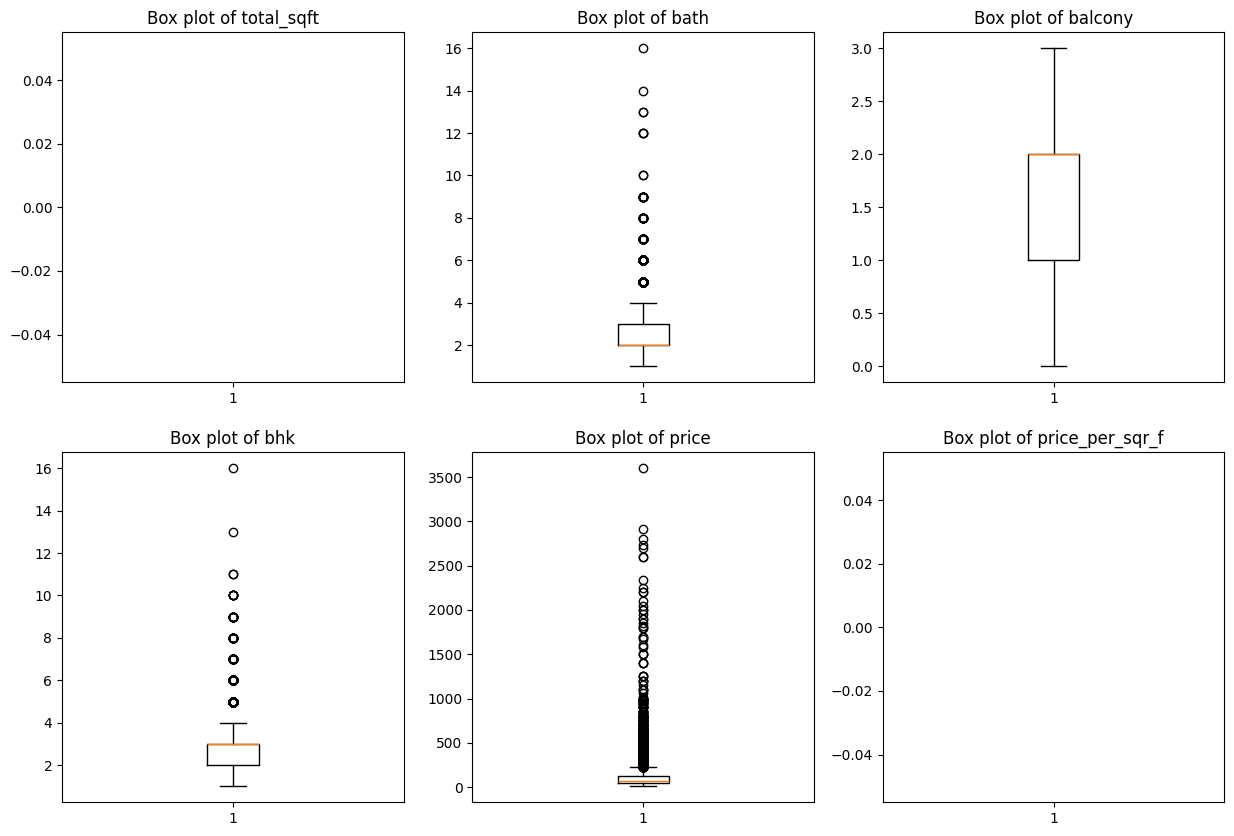

In [46]:
# visualize box plot for all numerical features
numerical_features = ['total_sqft', 'bath', 'balcony', 'bhk', 'price', 'price_per_sqr_f']
plt.figure(figsize=(15,10)) 
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i +1)
    plt.boxplot(df[feature])
    plt.title(f'Box plot of {feature}')